## **Linear Regression with Python Scikit Learn**
#### In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Author- Saarthak Mehta


### **Simple Linear Regression**
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('1st task.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

Text(0, 0.5, 'Marks/Scores')

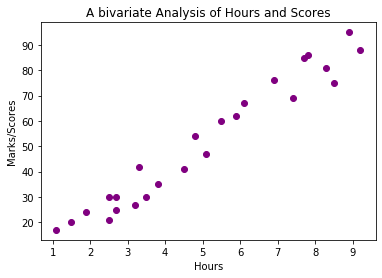

In [4]:
plt.scatter(data['Hours'],data['Scores'],c='purple')
plt.title('A bivariate Analysis of Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Marks/Scores')

#### **We can see a linear relation between the hours and the scores from this scatter plot and thus we will use linear regression**

#### The Below line shuffles the data in our dataset, so that the order can be randomized.

In [5]:
data_new=data.sample(frac=1).reset_index(drop=True)

In [6]:
data_new

,Hours,Scores
0,5.9,62
1,1.1,17
2,8.5,75
3,6.9,76
4,6.1,67
5,2.5,21
6,3.3,42
7,8.9,95
8,8.3,81
9,1.5,20


#### Data identification: We will assign Hours as our independent variable and Scores as our dependent variable
#### The equation will be 
* y=W*x+b
###### Here W is the weights and b is the bias value.  

In [7]:
x=data_new['Hours']
y=data_new['Scores']

In [8]:
x.shape,y.shape

((25,), (25,))

##### We reshape these values to convert into vector form

In [9]:
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [10]:
x.shape,y.shape

((25, 1), (25, 1))

#### We need to split the data so that we can see how well it works on test sets and accordingly compare.

In [11]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.2,random_state=10)

In [12]:
from sklearn.linear_model import LinearRegression 

In [13]:
lr=LinearRegression()

In [14]:
#train_x=train_x.values.reshape(-1,1)
#train_y=train_y.values.reshape(-1,1)
#test_x=test_x.values.reshape(-1,1)
#test_y=test_y.values.reshape(-1,1)

In [15]:
train_x.shape

(20, 1)

In [16]:
train_y.shape

(20, 1)

#### Fitting the model by feeding it the train set values

In [17]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.score(test_x,test_y)

0.8893525317887709

#### lr.score gives the accuracy level ,lr.coef_ is the weights and lr.intercept_ is the bias values

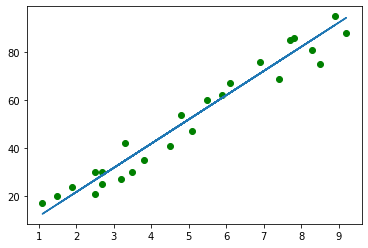

In [19]:
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y,c='green')
plt.plot(x, line);
plt.show()

In [20]:
y_pred=lr.predict(test_x)

### Evaluating the model

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
mean_absolute_error(test_y,y_pred)

6.10289841143438

In [23]:
b=np.array(y_pred)
b

array([[26.75000343],
       [12.62698227],
       [26.75000343],
       [87.27723697],
       [39.86423736]])

In [24]:
test_y

array([[21],
       [17],
       [30],
       [75],
       [35]], dtype=int64)

In [25]:
b,test_y

(array([[26.75000343],
        [12.62698227],
        [26.75000343],
        [87.27723697],
        [39.86423736]]),
 array([[21],
        [17],
        [30],
        [75],
        [35]], dtype=int64))

#### Giving our own input and checking how it works 

In [26]:
hours=[[5.3]]
c=lr.predict(hours)
print(c)

[[54.99604575]]
